In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df = df[['ProfileName', 'Score', 'Summary', 'Text']]

In [5]:
df

,ProfileName,Score,Summary,Text
0,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
568449,Lettie D. Carter,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,R. Sawyer,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,"pksd ""pk_007""",5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,"Kathy A. Welch ""katwel""",5,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [6]:
df.describe()

,Score
count,568454.000000
mean,4.183199
std,1.310436
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df[df.Score == 3]

,ProfileName,Score,Summary,Text
45,K. A. Freel,3,Hearty Oatmeal,This seems a little more wholesome than some o...
47,"kbogo ""shoelover""",3,Mushy,"The flavors are good. However, I do not see a..."
49,JMay,3,Same stuff,This is the same stuff you can buy at the big ...
53,"Roel Trevino ""protomex""",3,not ass kickin,we're used to spicy foods down here in south t...
60,"Lisa J. Szlosek ""lisa""",3,Better price for this at Target,Watch your prices with this. While the assort...
...,...,...,...,...
568369,"Gregg Somers ""chillerdad""",3,This is Earl Grey!???,"An admitted fan of Stash Earl Grey, neverthele..."
568379,"C. E. Hunsicker ""Hatshepsut""",3,Just OK,I hadn't tried this taco seasoning prior to pu...
568394,Lirion73,3,"Smell delightful, taste not so much",I picked up these honey sticks because I'm in ...
568401,Lori,3,Agave Nectar,It's great to have agave in a portable format....


In [8]:
df = df[df.Score != 3]

In [9]:
df

,ProfileName,Score,Summary,Text
0,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
568449,Lettie D. Carter,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,R. Sawyer,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,"pksd ""pk_007""",5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,"Kathy A. Welch ""katwel""",5,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [10]:
from bs4 import BeautifulSoup
import re,string,unicodedata
import warnings

warnings.filterwarnings('ignore')

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
df['Text'] = df['Text'].apply(denoise_text)

In [11]:
df['Text'] = df['Text'] + ' ' + df['Summary'] + ' ' + df['ProfileName']
del df['Summary']
del df['ProfileName']
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [12]:
def score_filter(score):
    if(score == 1 or score == 2):
        return 0
    else:
        return 1
df.Score = df.Score.apply(score_filter) 

In [13]:
df

,Score,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...
...,...,...
568449,1,Great for sesame chicken..this is a good if no...
568450,0,I'm disappointed with the flavor. The chocolat...
568451,1,"These stars are small, so you can give 10-15 o..."
568452,1,These are the BEST treats for training and rew...


In [14]:
df_X = df.drop('Score', axis = 1)
df_y = df['Score']

In [15]:
df['Score'].value_counts()

1    443777
0     82037
Name: Score, dtype: int64

In [16]:
df.isna().sum()

Score     0
Text     41
dtype: int64

In [17]:
df.Text.fillna("",inplace = True)

In [18]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [19]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)

In [20]:
df.Text = df.Text.apply(stem_text)

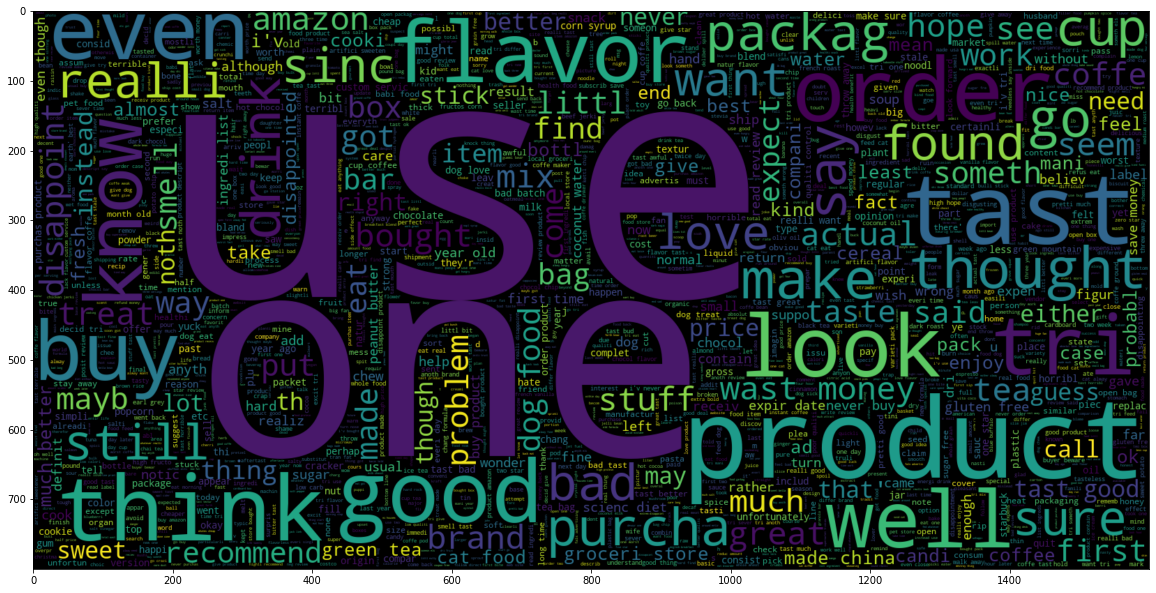

In [29]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(df[df.Score == 0].Text))
plt.imshow(wc , interpolation = 'bilinear')

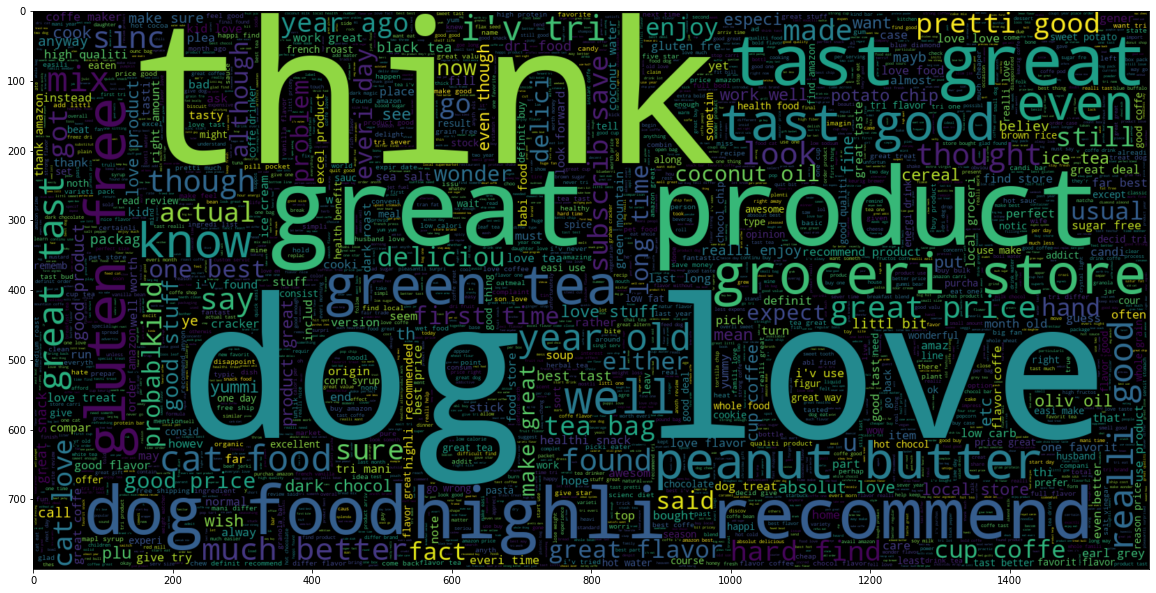

In [27]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(df[df.Score ==1].Text))
plt.imshow(wc , interpolation = 'bilinear')

In [38]:
from sklearn.model_selection import train_test_split
x_training,x_test,y_training,y_test = train_test_split(df.Text,df.Score,test_size = 0.2,random_state = 42)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df = 0,max_df = 1,ngram_range = (1,2))
new_X_train = cv.fit_transform(x_training)
new_X_test = cv.transform(x_test)

print('cv_train:',new_X_train.shape)
print('cv_test:',new_X_test.shape)


cv_train: (420651, 2423364)
cv_test: (105163, 2423364)


In [49]:
print(new_X_train.shape, y_training.shape)

(420651, 2423364) (420651,)


In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr_train = lr.fit(new_X_train, y_training)
print(lr_train)

LogisticRegression(C=1, max_iter=1000, random_state=42)


In [58]:
lr_pred = lr.predict(new_X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
lr_score = accuracy_score(y_test, lr_pred)
print("lr_score :", lr_score)

lr_score : 0.8568983387693391


In [60]:
lr_report = classification_report(y_test,lr_pred,target_names = ['0','1'])
print(lr_report)

              precision    recall  f1-score   support

           0       0.99      0.08      0.15     16379
           1       0.86      1.00      0.92     88784

    accuracy                           0.86    105163
   macro avg       0.92      0.54      0.54    105163
weighted avg       0.88      0.86      0.80    105163



Conclusion - The accuracy of the entire model was 85%. The predictions made by the logistic regression algorithm for scores that were 'not good', showed high precision, however very little recall meaning the model is very accurate when it makes a prediction, however it is failing to accurately identify the majority of 'not good' reviews within the dataset. The predictions for Good reviews was however very accurate on all fronts.